In [110]:
from sklearn.datasets import load_iris
from sklearn.cluster import  KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import mode
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
k = 3

In [89]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
y = pd.DataFrame(iris.target, columns = ["Target"])

In [108]:
def find_accuracy_and_plot(clusters, name):
    labels = np.zeros_like(clusters)
    
    for i in range(k):
        cat = (i == clusters)
        labels[cat] = mode(y.Target[cat])[0]
    y_pred = labels

    print(f"Accuracy Score using {name} is {accuracy_score(y, y_pred)}\n")

    plt.figure(figsize = (10, 10))
    colors = np.array(["red", "green", "blue"])
    
    # plotting actual data of first two columns
    plt.subplot(2, 2, 1)
    plt.scatter(X.Sepal_Length, X.Sepal_Width, c = colors[y.Target])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title("Actual Clusters")
    
    # plotting predicted data of first two columns
    plt.subplot(2, 2, 2)
    plt.scatter(X.Sepal_Length, X.Sepal_Width, c = colors[y_pred])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title("Predicted Clusters")
    
    plt.show()

Accuracy Score using KMeans is 0.8933333333333333



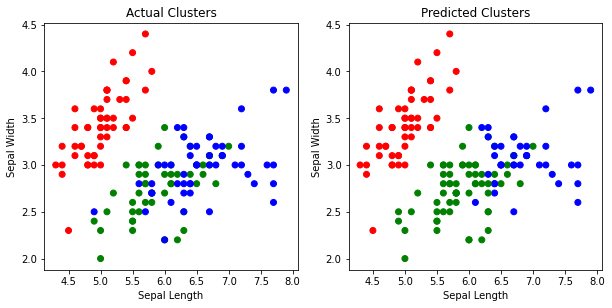

In [109]:
# KMeans 
kmeans = KMeans(n_clusters = k)
clusters = kmeans.fit_predict(X)

find_accuracy_and_plot(clusters, "KMeans")

Accuracy Score using GMM is 0.9666666666666667



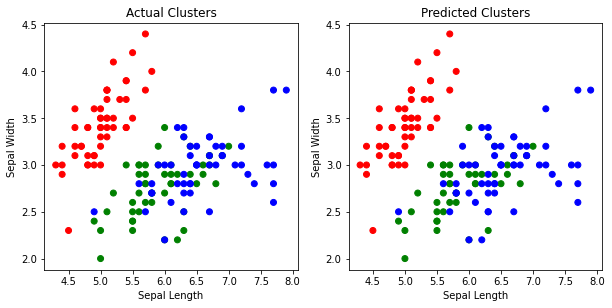

In [113]:
scaler = StandardScaler()
scaler.fit(X)
scaler_X = scaler.transform(X)

train_test_split
# EM 
gmm = GMM(n_components = k)
clusters = gmm.fit_predict(scaler_X)

find_accuracy_and_plot(clusters, "GMM")